### Why use PySpark instead of Pandas?

**Scalability and better performance for Big Data:**

- **PySpark**: Designed to work with large volumes of data distributed across clusters. It can handle terabytes or even petabytes of data by distributing the processing across multiple machines. It utilizes parallel processing and can perform operations in a distributed manner, resulting in faster processing times for large datasets.
- **Pandas**: Best suited for smaller datasets that fit into the memory of a single computer. It operates more sequentially and is limited by the resources of a single machine, which can lead to slower processing times for large datasets.

**SQL Support:**

- **PySpark**: Offers robust support for SQL queries through Spark SQL, allowing you to seamlessly mix DataFrame operations with SQL queries.
- **Pandas**: Provides limited SQL query support through libraries like pandasql, but it is not as integrated or comprehensive as PySpark's support.


Path variables

In [16]:
username = '.....' # insert your username

data_main_path = f'C:/Users/{username}/Novo Banco S.A/GVM Team - General/11_MarketRisk/PROCESSO_VALIDACAO_2024/01_MARKET_RISK/Valid Anual/05_DADOS/'
euribors_path = data_main_path + 'euribors/'

Import pyspark libraries

In [17]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date

Initialize spark session

In [24]:
spark = SparkSession.builder \
    .appName("EuriborDataProcessing") \
    .getOrCreate()

Loading and reading CSV files using spark

In [25]:
df_euribor12m = spark.read.csv(euribors_path + 'Euribor12M.csv', header=True, inferSchema=True).drop("TIME PERIOD")
df_euribor12m = df_euribor12m.withColumn('DATE', to_date(col('DATE')))

df_euribor6m = spark.read.csv(euribors_path + 'Euribor6M.csv', header=True, inferSchema=True).drop("TIME PERIOD")
df_euribor6m = df_euribor6m.withColumn('DATE', to_date(col('DATE')))

df_euribor3m = spark.read.csv(euribors_path + 'Euribor3M.csv', header=True, inferSchema=True).drop("TIME PERIOD")
df_euribor3m = df_euribor3m.withColumn('DATE', to_date(col('DATE')))

df_euribor1m = spark.read.csv(euribors_path + 'Euribor1M.csv', header=True, inferSchema=True).drop("TIME PERIOD")
df_euribor1m = df_euribor1m.withColumn('DATE', to_date(col('DATE')))

Displaying dataframe first 4 rows

In [39]:
df_euribor1m.show(4)

+----------+---------------------------------------------------------------------------------------------------------------+
|      DATE|Euribor 1-month - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR1MD_.HSTA)|
+----------+---------------------------------------------------------------------------------------------------------------+
|1994-01-31|                                                                                                           7.12|
|1994-02-28|                                                                                                           6.99|
|1994-03-31|                                                                                                           6.84|
|1994-04-30|                                                                                                           6.69|
+----------+---------------------------------------------------------------------------------------------------------------+


In [27]:
df.printSchema()

root
 |-- DATE: date (nullable = true)
 |-- TIME PERIOD: string (nullable = true)
 |-- Euribor 1-month - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR1MD_.HSTA): double (nullable = true)



Merging dataframes

In [28]:
df_euribor_temp = df_euribor12m.join(df_euribor6m, on='DATE', how='left')
df_euribor_temp = df_euribor_temp.join(df_euribor3m, on='DATE', how='left')
df_euribor = df_euribor_temp.join(df_euribor1m, on='DATE', how='left')

Renaming columns

In [30]:
df_euribor = df_euribor.withColumnRenamed("DATE", "Date") \
                       .withColumnRenamed(df_euribor12m.columns[1], "Euribor12M") \
                       .withColumnRenamed(df_euribor6m.columns[1], "Euribor6M") \
                       .withColumnRenamed(df_euribor3m.columns[1], "Euribor3M") \
                       .withColumnRenamed(df_euribor1m.columns[1], "Euribor1M")

Filtering dataframe

In [31]:
df_euribor = df_euribor.filter(df_euribor['Date'] >= '2020-01-01')

In [32]:
df_euribor.show()

+----------+----------+---------+---------+---------+
|      Date|Euribor12M|Euribor6M|Euribor3M|Euribor1M|
+----------+----------+---------+---------+---------+
|2020-01-31|   -0.2534|  -0.3301|  -0.3911|  -0.4569|
|2020-02-29|   -0.2881|  -0.3552|  -0.4089|  -0.4731|
|2020-03-31|   -0.2656|  -0.3649|  -0.4166|  -0.4777|
|2020-04-30|   -0.1082|   -0.192|  -0.2541|  -0.4281|
|2020-05-31|   -0.0814|  -0.1431|   -0.272|  -0.4643|
|2020-06-30|   -0.1475|  -0.2227|   -0.376|  -0.4929|
|2020-07-31|   -0.2789|  -0.3461|  -0.4441|  -0.5088|
|2020-08-31|   -0.3589|  -0.4329|  -0.4797|  -0.5173|
|2020-09-30|   -0.4146|  -0.4626|  -0.4914|  -0.5217|
|2020-10-31|    -0.466|   -0.494|  -0.5091|  -0.5385|
|2020-11-30|   -0.4806|   -0.509|  -0.5209|  -0.5414|
|2020-12-31|   -0.4966|  -0.5186|  -0.5381|  -0.5607|
|2021-01-31|   -0.5047|  -0.5285|  -0.5472|  -0.5621|
|2021-02-28|   -0.5009|  -0.5205|  -0.5411|  -0.5534|
|2021-03-31|   -0.4867|   -0.516|  -0.5391|  -0.5534|
|2021-04-30|   -0.4835|  -0.

Selecting only the 'Date', 'Euribor12M' and 'Euribor6M' columns

In [36]:
df_euribor_selected = df_euribor.select('Date', 'Euribor12M', 'Euribor6M')

df_euribor_selected.show()

+----------+----------+---------+
|      Date|Euribor12M|Euribor6M|
+----------+----------+---------+
|2020-01-31|   -0.2534|  -0.3301|
|2020-02-29|   -0.2881|  -0.3552|
|2020-03-31|   -0.2656|  -0.3649|
|2020-04-30|   -0.1082|   -0.192|
|2020-05-31|   -0.0814|  -0.1431|
|2020-06-30|   -0.1475|  -0.2227|
|2020-07-31|   -0.2789|  -0.3461|
|2020-08-31|   -0.3589|  -0.4329|
|2020-09-30|   -0.4146|  -0.4626|
|2020-10-31|    -0.466|   -0.494|
|2020-11-30|   -0.4806|   -0.509|
|2020-12-31|   -0.4966|  -0.5186|
|2021-01-31|   -0.5047|  -0.5285|
|2021-02-28|   -0.5009|  -0.5205|
|2021-03-31|   -0.4867|   -0.516|
|2021-04-30|   -0.4835|  -0.5158|
|2021-05-31|   -0.4806|   -0.513|
|2021-06-30|   -0.4839|   -0.515|
|2021-07-31|   -0.4907|   -0.516|
|2021-08-31|   -0.4982|  -0.5274|
+----------+----------+---------+
only showing top 20 rows



Converting PySpark dataframe to a pandas DataFrame

In [33]:
df_euribor_pandas = df_euribor.toPandas()
df_euribor_pandas.head()

,Date,Euribor12M,Euribor6M,Euribor3M,Euribor1M
0,2020-01-31,-0.2534,-0.3301,-0.3911,-0.4569
1,2020-02-29,-0.2881,-0.3552,-0.4089,-0.4731
2,2020-03-31,-0.2656,-0.3649,-0.4166,-0.4777
3,2020-04-30,-0.1082,-0.1920,-0.2541,-0.4281
4,2020-05-31,-0.0814,-0.1431,-0.2720,-0.4643


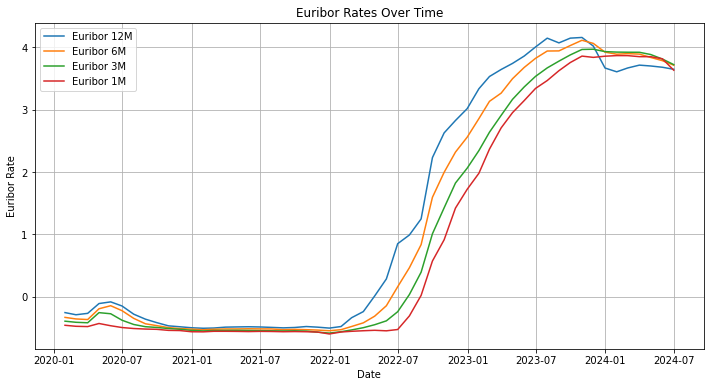

In [35]:
import matplotlib.pyplot as plt

# Ploting data
plt.figure(figsize=(12, 6))
plt.plot(df_euribor_pandas['Date'], df_euribor_pandas['Euribor12M'], label='Euribor 12M')
plt.plot(df_euribor_pandas['Date'], df_euribor_pandas['Euribor6M'], label='Euribor 6M')
plt.plot(df_euribor_pandas['Date'], df_euribor_pandas['Euribor3M'], label='Euribor 3M')
plt.plot(df_euribor_pandas['Date'], df_euribor_pandas['Euribor1M'], label='Euribor 1M')


plt.xlabel('Date')
plt.ylabel('Euribor Rate')
plt.title('Euribor Rates Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
df_test = df_euribor.withColumn("Euribor12M", col("Euribor12M").cast("string"))

df_test.show(2)

+----------+----------+---------+---------+---------+
|      Date|Euribor12M|Euribor6M|Euribor3M|Euribor1M|
+----------+----------+---------+---------+---------+
|2020-01-31|   -0.2534|  -0.3301|  -0.3911|  -0.4569|
|2020-02-29|   -0.2881|  -0.3552|  -0.4089|  -0.4731|
+----------+----------+---------+---------+---------+
only showing top 2 rows



In [45]:
df_test.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Euribor12M: string (nullable = true)
 |-- Euribor6M: double (nullable = true)
 |-- Euribor3M: double (nullable = true)
 |-- Euribor1M: double (nullable = true)



**Finishing Spark session**

You should close the Spark Session at the end of your script or notebook, after completing all data processing operations. Closing the session releases the resources allocated by Spark, avoiding memory waste and other computational resources.

In [46]:
spark.stop()

# Load data from Oracle using PySpark and Spark SQL

Initializing spark session and config definitions

In [48]:
spark = SparkSession.builder \
    .appName("Load Data from Oracle") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

Define Oracle database conections configs

In [49]:
url = "jdbc:oracle:thin:@//host:port/service_name"
properties = {
    "user": "seu_usuario",
    "password": "sua_senha",
    "driver": "oracle.jdbc.driver.OracleDriver"
}

Write SQL query to access the data

In [50]:
table_path = "your_table_path" # insert your table path

query = f"SELECT * FROM {table_path}"

Loading data from Spark SQL

In [ ]:
df = spark.read.jdbc(url=url, table=query, properties=properties)

df.show()

In [ ]:
spark.stop()